In [1]:
import pandas as pd
import japanize_matplotlib

rear_muscle_data1 = pd.read_csv('../Data/rear_muscle_data1.csv')
mid_muscle_data1 = pd.read_csv('../Data/mid_muscle_data1.csv')
fore_muscle_data1 = pd.read_csv('../Data/fore_muscle_data1.csv')
rear_muscle_data5 = pd.read_csv('../Data/rear_muscle_data5.csv')
mid_muscle_data5 = pd.read_csv('../Data/mid_muscle_data5.csv')
fore_muscle_data5 = pd.read_csv('../Data/fore_muscle_data5.csv')
rear_muscle_data6 = pd.read_csv('../Data/rear_muscle_data6.csv')
mid_muscle_data6 = pd.read_csv('../Data/mid_muscle_data6.csv')
fore_muscle_data6 = pd.read_csv('../Data/fore_muscle_data6.csv')
rear_muscle_data14 = pd.read_csv('../Data/rear_muscle_data14.csv')
mid_muscle_data14 = pd.read_csv('../Data/mid_muscle_data14.csv')
fore_muscle_data14 = pd.read_csv('../Data/fore_muscle_data14.csv')
rear_muscle_data15 = pd.read_csv('../Data/rear_muscle_data15.csv')
mid_muscle_data15 = pd.read_csv('../Data/mid_muscle_data15.csv')
fore_muscle_data15 = pd.read_csv('../Data/fore_muscle_data15.csv')
rear_muscle_data16 = pd.read_csv('../Data/rear_muscle_data16.csv')
mid_muscle_data16 = pd.read_csv('../Data/mid_muscle_data16.csv')
fore_muscle_data16 = pd.read_csv('../Data/fore_muscle_data16.csv')
rear_muscle_data17 = pd.read_csv('../Data/rear_muscle_data17.csv')
mid_muscle_data17 = pd.read_csv('../Data/mid_muscle_data17.csv')
fore_muscle_data17 = pd.read_csv('../Data/fore_muscle_data17.csv')
rear_muscle_data19 = pd.read_csv('../Data/rear_muscle_data19.csv')
mid_muscle_data19 = pd.read_csv('../Data/mid_muscle_data19.csv')
fore_muscle_data19 = pd.read_csv('../Data/fore_muscle_data19.csv')
rear_muscle_data20 = pd.read_csv('../Data/rear_muscle_data20.csv')
mid_muscle_data20 = pd.read_csv('../Data/mid_muscle_data20.csv')
fore_muscle_data20 = pd.read_csv('../Data/fore_muscle_data20.csv')

In [2]:
rear_all_data = [rear_muscle_data1, rear_muscle_data5, rear_muscle_data6,
                 rear_muscle_data14, rear_muscle_data15, rear_muscle_data16,
                 rear_muscle_data17, rear_muscle_data19, rear_muscle_data20]

rear_all_data_abs = [df.abs() for df in rear_all_data]
rear_all = pd.concat(rear_all_data_abs, ignore_index=True)
# rear_all.to_csv('../Data/rear_all.csv', index=False)
rear_all

,Time,Tibialis antelior,Gastrocnemius medialis
0,0.160,0.037,0.023
1,0.161,0.003,0.003
2,0.162,0.015,0.011
3,0.163,0.010,0.009
4,0.164,0.012,0.009
...,...,...,...
81038,6.536,0.001,0.003
81039,6.537,0.002,0.002
81040,6.538,0.001,0.002
81041,6.539,0.007,0.002


In [3]:
mid_all_data = [mid_muscle_data1, mid_muscle_data5, mid_muscle_data6, mid_muscle_data14,
                mid_muscle_data15, mid_muscle_data16, mid_muscle_data17, mid_muscle_data19,
                mid_muscle_data20]

mid_all_data_abs = [df.abs() for df in mid_all_data]
mid_all = pd.concat(mid_all_data_abs, ignore_index=True)
# mid_all.to_csv('../Data/mid_all.csv', index=False)
mid_all

,Time,Tibialis antelior,Gastrocnemius medialis
0,0.280,0.034,0.029
1,0.281,0.010,0.005
2,0.282,0.025,0.004
3,0.283,0.013,0.002
4,0.284,0.015,0.000
...,...,...,...
72727,6.596,0.035,0.000
72728,6.597,0.050,0.001
72729,6.598,0.059,0.006
72730,6.599,0.103,0.009


In [4]:
fore_all_data = [fore_muscle_data1, fore_muscle_data5, fore_muscle_data6, fore_muscle_data14,
                fore_muscle_data15, fore_muscle_data16, fore_muscle_data17, fore_muscle_data19,
                fore_muscle_data20]

fore_all_data_abs = [df.abs() for df in fore_all_data]
fore_all = pd.concat(fore_all_data_abs, ignore_index=True)
# fore_all.to_csv('../Data/fore_all.csv', index=False)
fore_all

,Time,Tibialis antelior,Gastrocnemius medialis
0,0.360,0.042,0.030
1,0.361,0.001,0.001
2,0.362,0.015,0.011
3,0.363,0.008,0.008
4,0.364,0.009,0.014
...,...,...,...
107134,6.776,0.012,0.003
107135,6.777,0.085,0.005
107136,6.778,0.152,0.002
107137,6.779,0.180,0.002


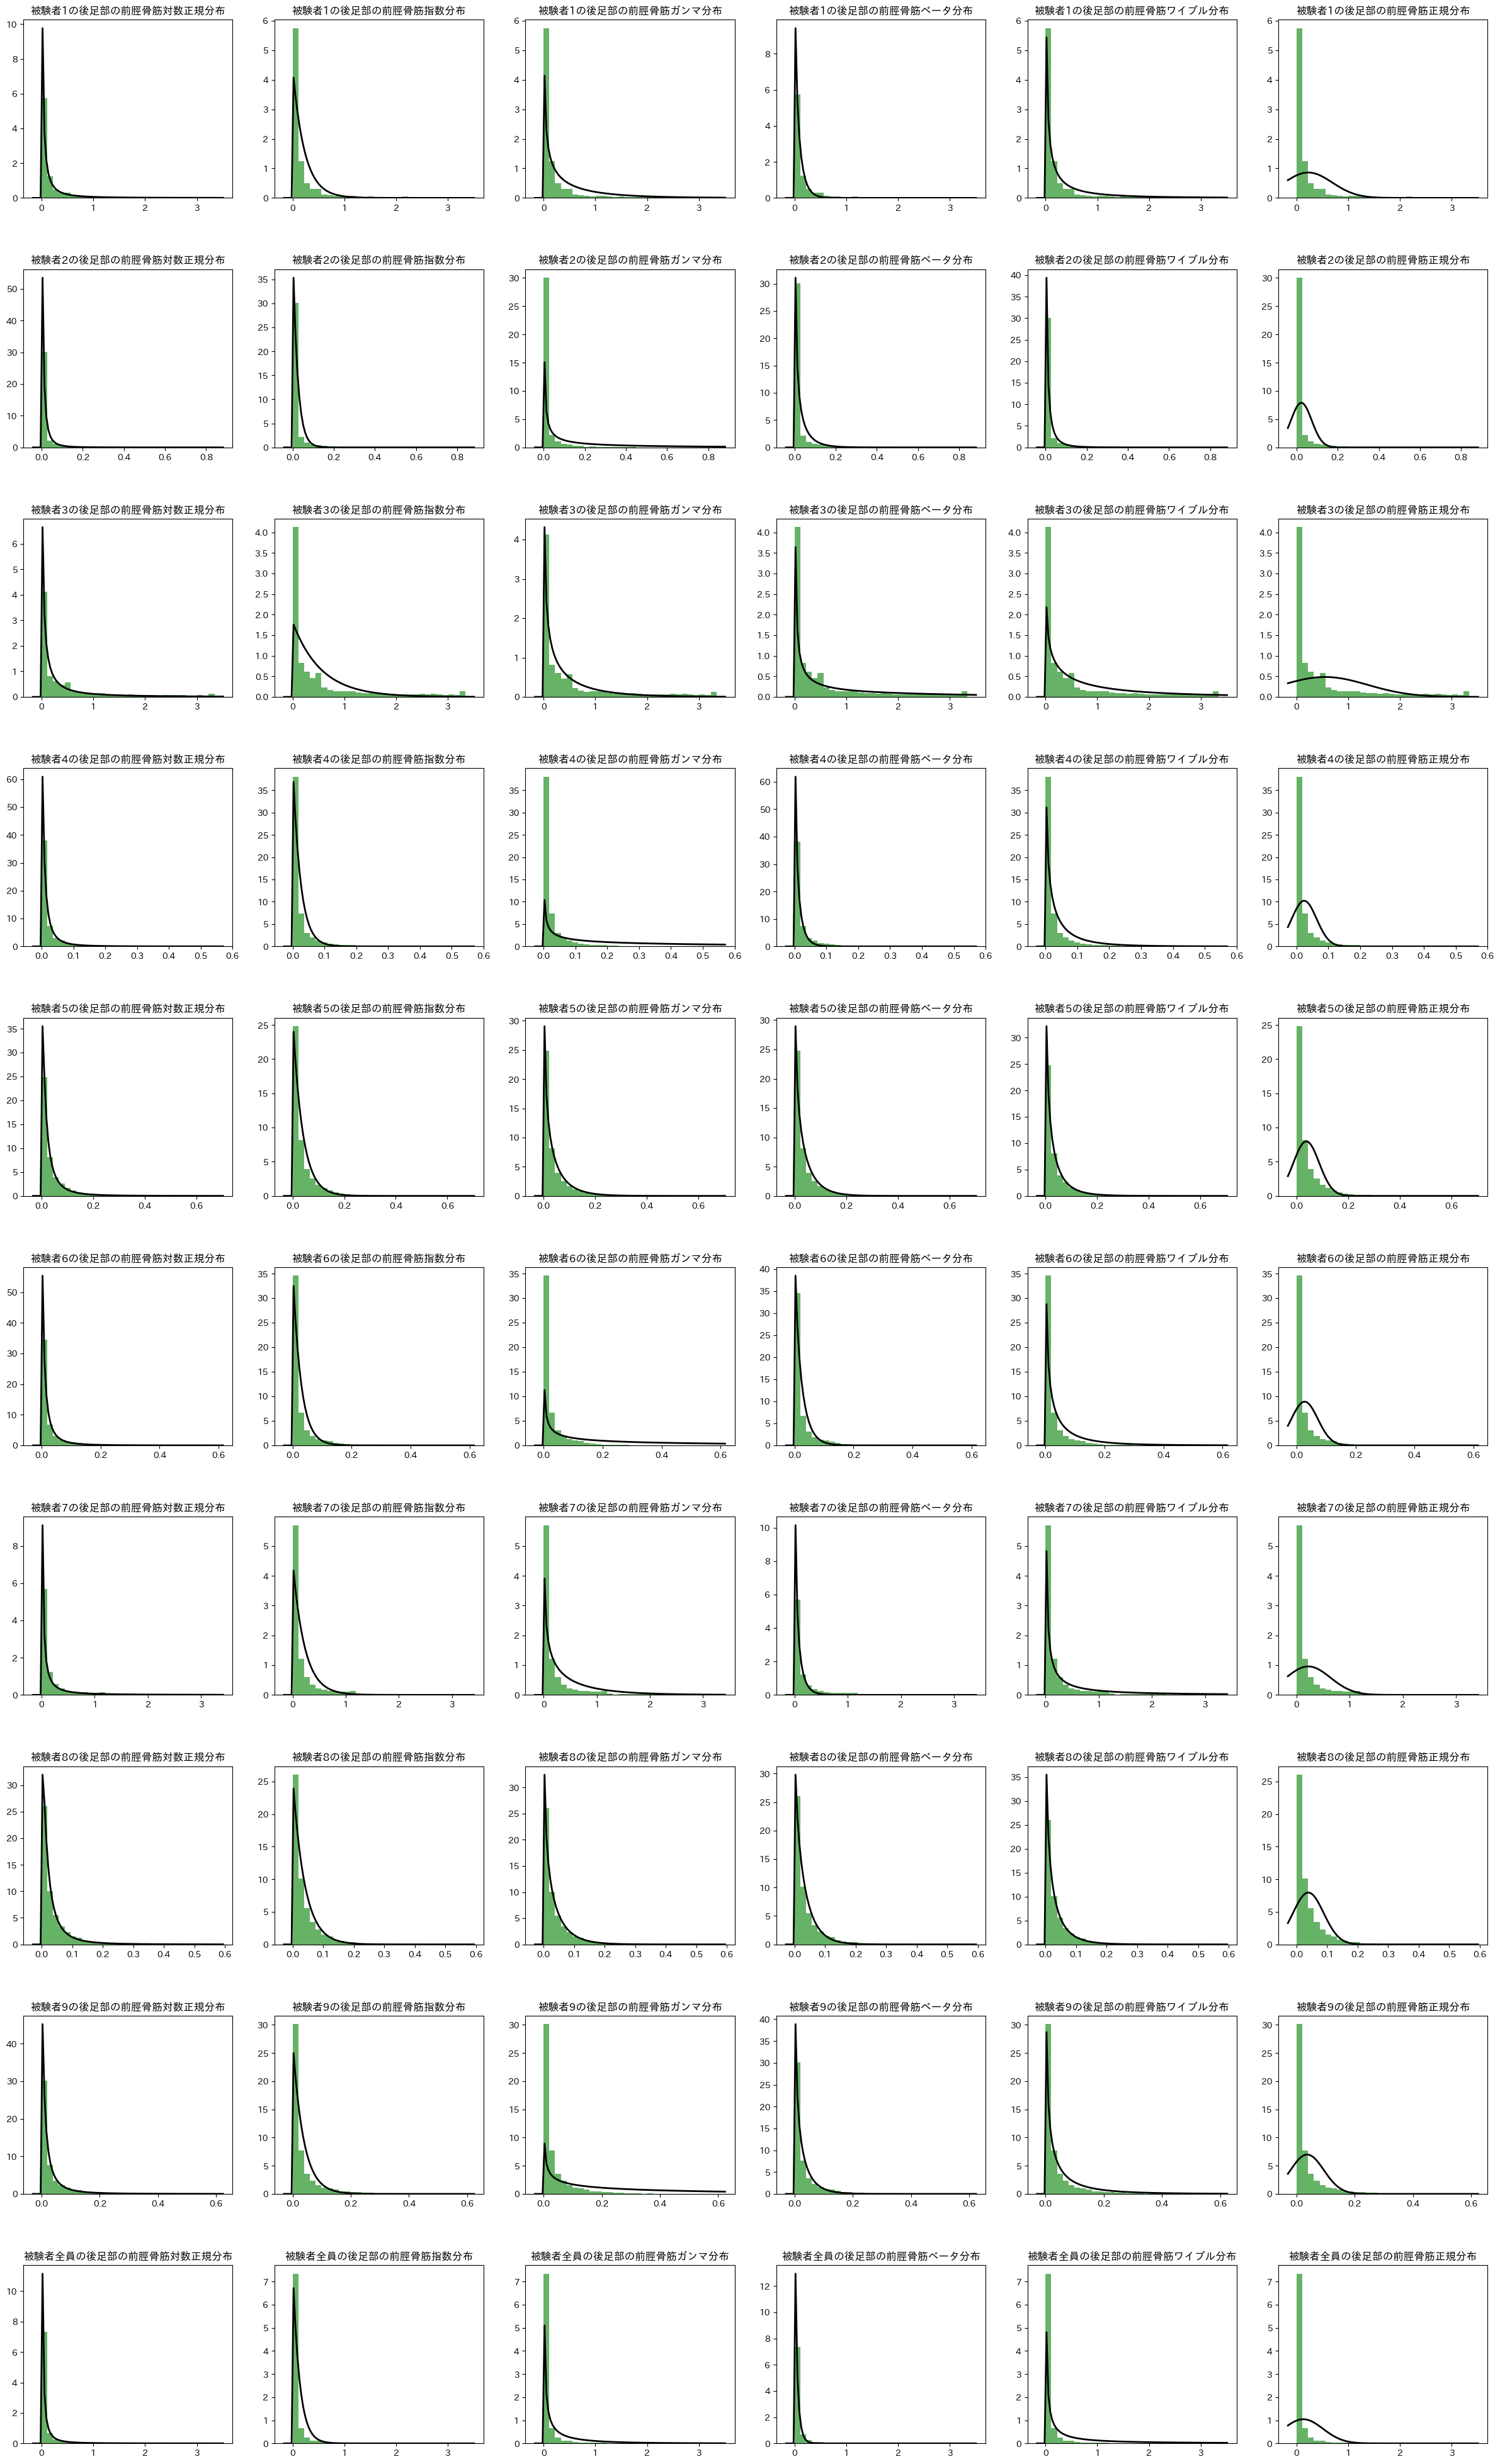

In [5]:
import scipy.stats as stats
import numpy as np
import matplotlib.pyplot as plt
import warnings

rear_all_list = [df.abs() for df in [rear_muscle_data1, rear_muscle_data5, rear_muscle_data6,
                                     rear_muscle_data14, rear_muscle_data15, rear_muscle_data16,
                                     rear_muscle_data17, rear_muscle_data19, rear_muscle_data20, rear_all]]

def fit_and_plot_distribution(data, dist_name, ax, i, is_last):
    dist = getattr(stats, dist_name)
    try:
        with warnings.catch_warnings():
            warnings.filterwarnings('ignore')
            params = dist.fit(data['Tibialis antelior'])
        ax.hist(data['Tibialis antelior'], bins=30, density=True, alpha=0.6, color='g')
        xmin, xmax = ax.get_xlim()
        x = np.linspace(xmin, xmax, 100)
        p = dist.pdf(x, *params)
        dist_name_japanese = {
            'lognorm': '対数正規分布',
            'expon': '指数分布',
            'gamma': 'ガンマ分布',
            'beta': 'ベータ分布',
            'weibull_min': 'ワイブル分布',
            'norm': '正規分布'
        }.get(dist_name, dist_name)
        
        title = f'被験者全員の後足部の前脛骨筋{dist_name_japanese}' if is_last else f'被験者{i+1}の後足部の前脛骨筋{dist_name_japanese}'
        ax.plot(x, p, 'k', linewidth=2)
        ax.set_title(title)
    except Exception as e:
        print(f"被験者{i+1}の{dist_name}のフィットに失敗しました: {e}")
        ax.set_title(f'被験者{i+1}の{dist_name_japanese}のフィットに失敗')

n_rows = len(rear_all_list)
n_cols = 6  
fig, axes = plt.subplots(n_rows, n_cols, figsize=(30, n_rows * 5))
fig.subplots_adjust(hspace=0.4)

for i, data in enumerate(rear_all_list):
    is_last = (i == len(rear_all_list) - 1)
    fit_and_plot_distribution(data, 'lognorm', axes[i, 0], i, is_last)
    fit_and_plot_distribution(data, 'expon', axes[i, 1], i, is_last)
    fit_and_plot_distribution(data, 'gamma', axes[i, 2], i, is_last)
    fit_and_plot_distribution(data, 'beta', axes[i, 3], i, is_last)
    fit_and_plot_distribution(data, 'weibull_min', axes[i, 4], i, is_last)
    fit_and_plot_distribution(data, 'norm', axes[i, 5], i, is_last)

results_path = '../Plots/後足部の各分布図.png'
plt.savefig(results_path, bbox_inches='tight')
plt.show()

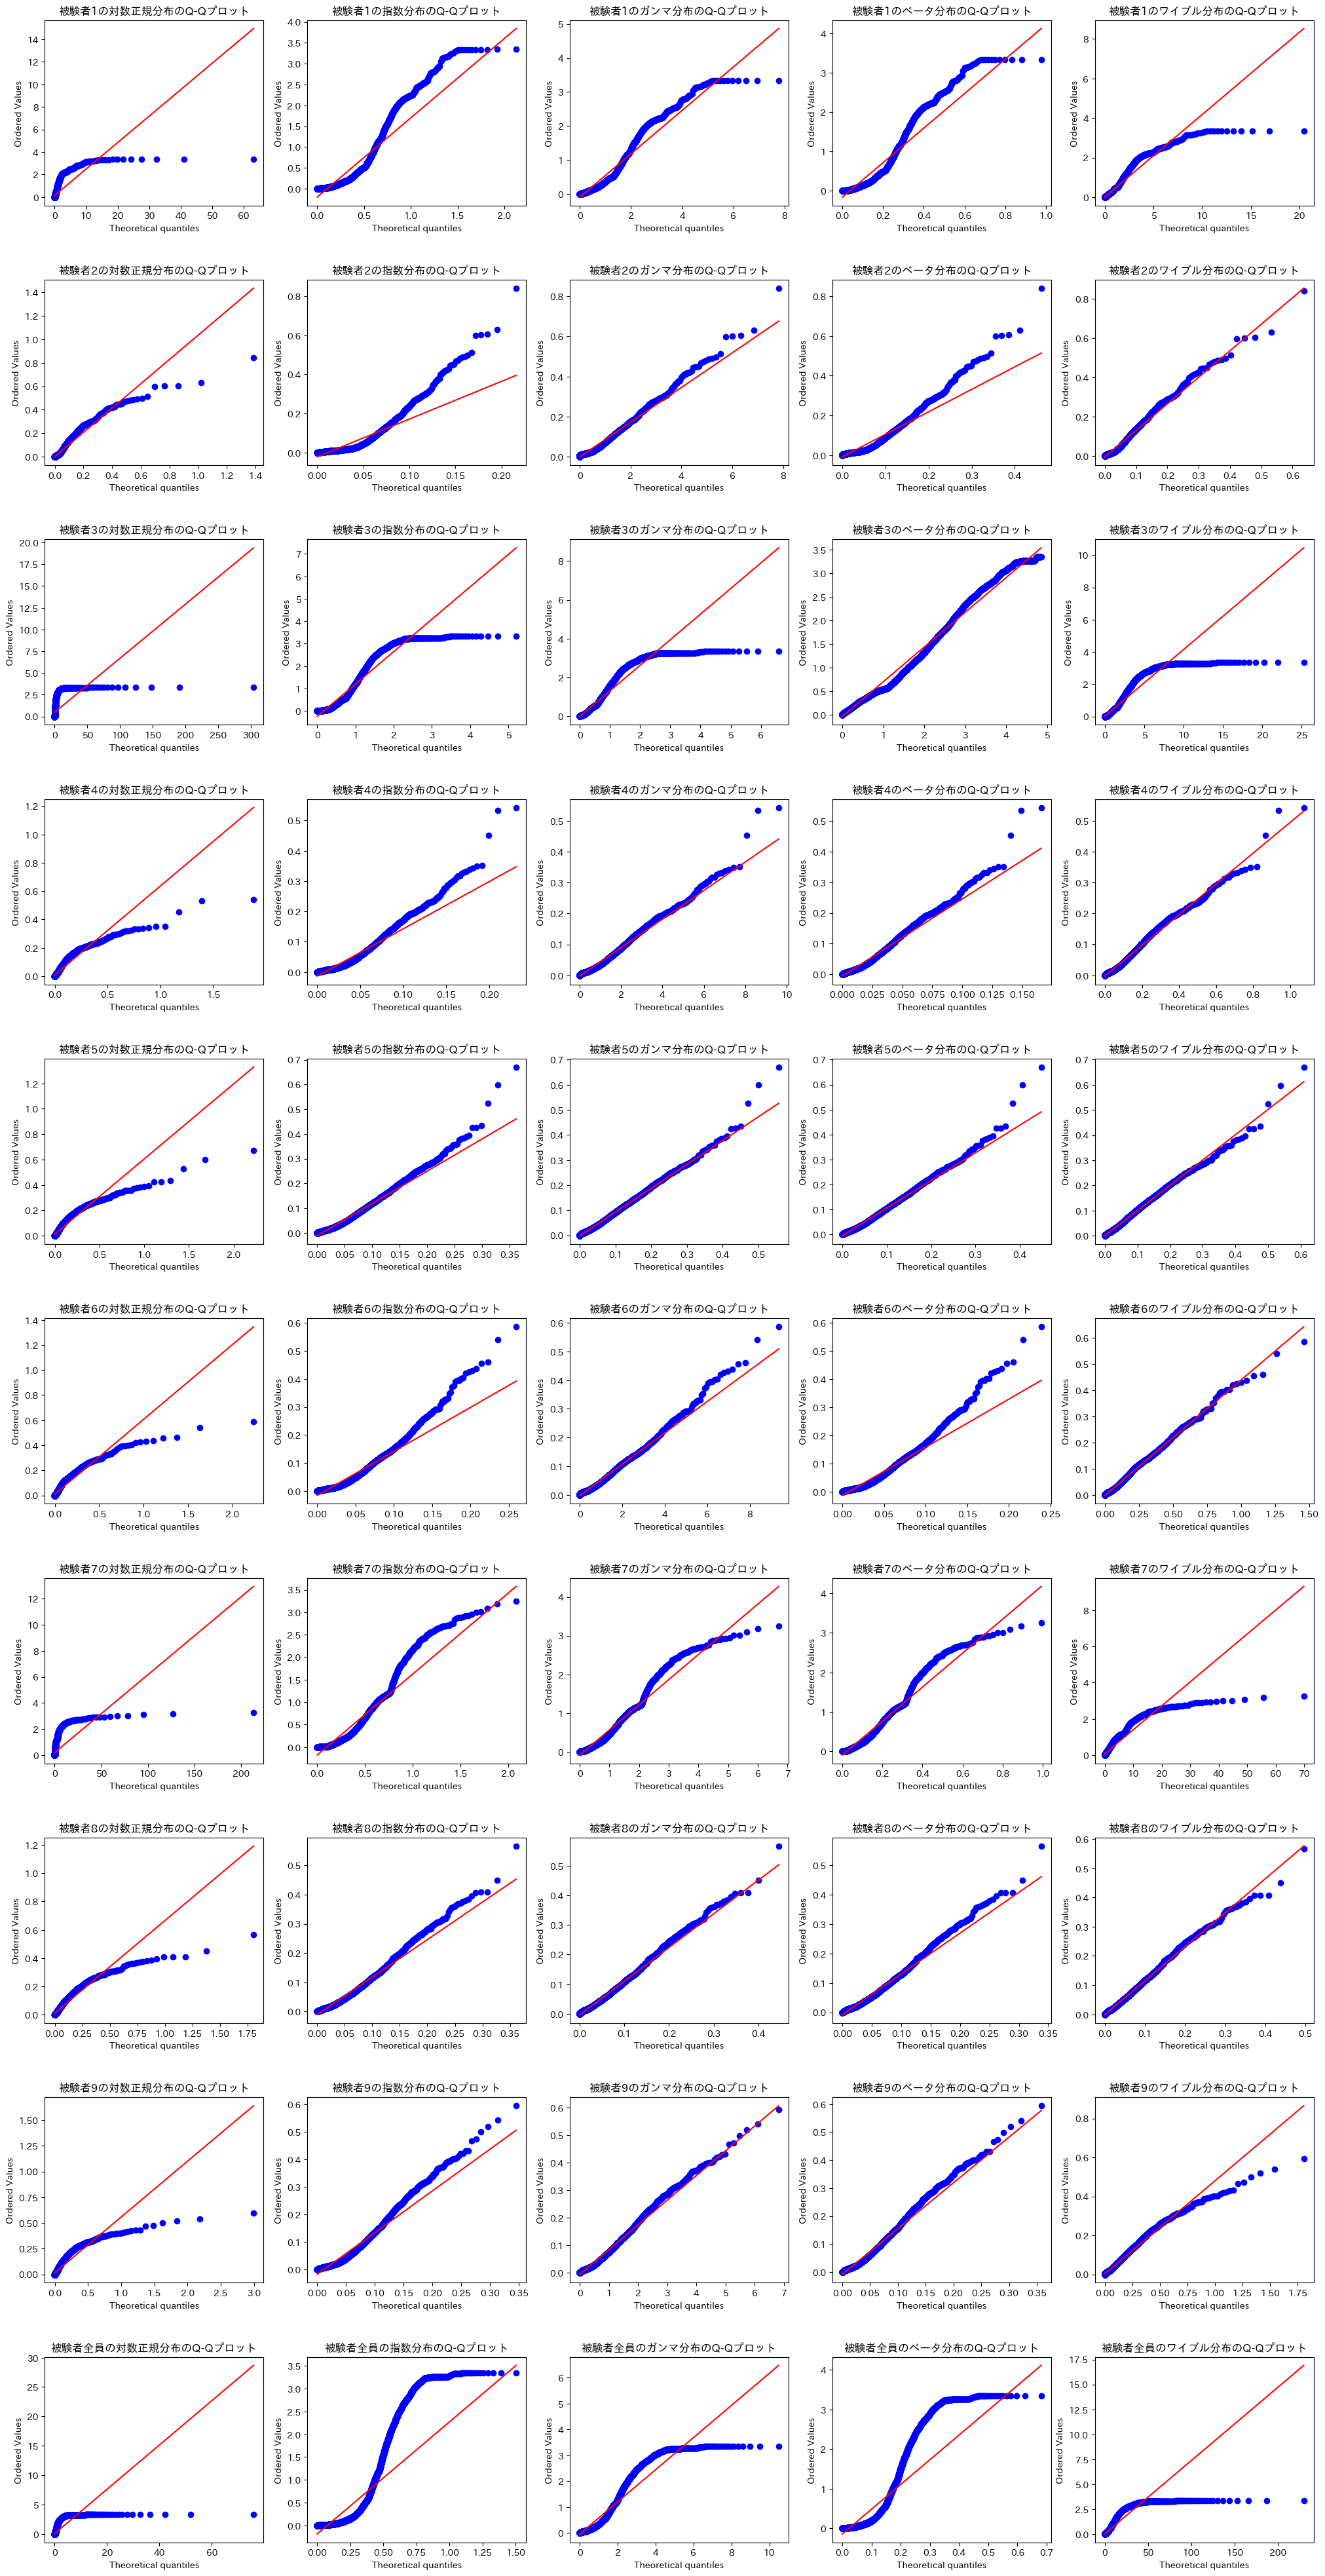

被験者1の対数正規分布のコルモゴロフ=スミルノフ検定: 統計量 = 0.0302, p値 = 0.0000
被験者1の指数分布のコルモゴロフ=スミルノフ検定: 統計量 = 0.2994, p値 = 0.0000
被験者1のガンマ分布のコルモゴロフ=スミルノフ検定: 統計量 = 0.2815, p値 = 0.0000
被験者1のベータ分布のコルモゴロフ=スミルノフ検定: 統計量 = 0.1359, p値 = 0.0000
被験者1のワイブル分布のコルモゴロフ=スミルノフ検定: 統計量 = 0.1857, p値 = 0.0000
被験者2の対数正規分布のコルモゴロフ=スミルノフ検定: 統計量 = 0.0746, p値 = 0.0000
被験者2の指数分布のコルモゴロフ=スミルノフ検定: 統計量 = 0.2541, p値 = 0.0000
被験者2のガンマ分布のコルモゴロフ=スミルノフ検定: 統計量 = 0.3740, p値 = 0.0000
被験者2のベータ分布のコルモゴロフ=スミルノフ検定: 統計量 = 0.1804, p値 = 0.0000
被験者2のワイブル分布のコルモゴロフ=スミルノフ検定: 統計量 = 0.2067, p値 = 0.0000
被験者3の対数正規分布のコルモゴロフ=スミルノフ検定: 統計量 = 0.0648, p値 = 0.0000
被験者3の指数分布のコルモゴロフ=スミルノフ検定: 統計量 = 0.2784, p値 = 0.0000
被験者3のガンマ分布のコルモゴロフ=スミルノフ検定: 統計量 = 0.0858, p値 = 0.0000
被験者3のベータ分布のコルモゴロフ=スミルノフ検定: 統計量 = 0.1295, p値 = 0.0000
被験者3のワイブル分布のコルモゴロフ=スミルノフ検定: 統計量 = 0.2677, p値 = 0.0000
被験者4の対数正規分布のコルモゴロフ=スミルノフ検定: 統計量 = 0.0545, p値 = 0.0000
被験者4の指数分布のコルモゴロフ=スミルノフ検定: 統計量 = 0.1919, p値 = 0.0000
被験者4のガンマ分布のコルモゴロフ=スミルノフ検定: 統計量 = 0.6225, p値 = 0.0000
被験者4のベータ分布のコルモゴロフ=スミルノフ検定: 統計量 = 0.1922, p値

In [6]:
def plot_qq(data, dist_name, ax, is_last, i):
    dist = getattr(stats, dist_name)
    try:
        with warnings.catch_warnings():
            warnings.filterwarnings('ignore')
            params = dist.fit(data['Tibialis antelior'])
        stats.probplot(data['Tibialis antelior'], dist=dist_name, sparams=params, plot=ax)
        dist_name_japanese = {
            'lognorm': '対数正規分布',
            'expon': '指数分布',
            'gamma': 'ガンマ分布',
            'beta': 'ベータ分布',
            'weibull_min': 'ワイブル分布'
        }.get(dist_name, dist_name)
        title = f'被験者全員の{dist_name_japanese}のQ-Qプロット' if is_last else f'被験者{i+1}の{dist_name_japanese}のQ-Qプロット'
        ax.set_title(title)
    except Exception as e:
        print(f"被験者{i+1}の{dist_name}のフィットに失敗しました: {e}")
        ax.set_title(f'被験者{i+1}の{dist_name_japanese}のQ-Qプロットに失敗')

def test_distribution(data, dist_name, params):
    data_values = data['Tibialis antelior']
    ks_result = stats.kstest(data_values, dist_name, args=params)
    return ks_result

def save_text_image(texts, filename):
    fig, ax = plt.subplots(figsize=(10, len(texts) * 0.3))
    for i, text in enumerate(texts):
        ax.text(0.5, 1 - (i + 1) / len(texts), text, fontsize=12, ha='center', va='center', wrap=True)
    ax.axis('off')
    plt.savefig(filename, bbox_inches='tight', pad_inches=0.1)
    plt.close(fig)

n_rows = len(rear_all_list)
n_cols = 5 
fig, axes = plt.subplots(n_rows, n_cols, figsize=(25, n_rows * 5))
fig.subplots_adjust(hspace=0.4)

results = []

dist_names = ['lognorm', 'expon', 'gamma', 'beta', 'weibull_min']

for i, data in enumerate(rear_all_list):
    is_last = (i == len(rear_all_list) - 1)
    
    for j, dist_name in enumerate(dist_names):
        ax = axes[i, j]
        plot_qq(data, dist_name, ax, is_last, i)
        try:
            with warnings.catch_warnings():
                warnings.filterwarnings('ignore')
                params = stats.__dict__[dist_name].fit(data['Tibialis antelior'])
            ks_result = test_distribution(data, dist_name, params)
        except Exception as e:
            print(f"被験者{i+1}の{dist_name}のフィットに失敗しました: {e}")
            ks_result = None
        
        dist_name_japanese = {
            'lognorm': '対数正規分布',
            'expon': '指数分布',
            'gamma': 'ガンマ分布',
            'beta': 'ベータ分布',
            'weibull_min': 'ワイブル分布'
        }.get(dist_name, dist_name)
        
        if ks_result is not None:
            if is_last:
                results.append(f"被験者全員の{dist_name_japanese}のコルモゴロフ=スミルノフ検定: 統計量 = {ks_result.statistic:.4f}, p値 = {ks_result.pvalue:.4f}")
            else:
                results.append(f"被験者{i+1}の{dist_name_japanese}のコルモゴロフ=スミルノフ検定: 統計量 = {ks_result.statistic:.4f}, p値 = {ks_result.pvalue:.4f}")

results_path = '../Plots/後足部の各分布のQQプロット.png'
plt.savefig(results_path, bbox_inches='tight')
plt.show()

for result in results:
    print(result)

save_text_image(results, '../Plots/後足部の各分布のコルモゴロフ=スミルノフ検定.png')

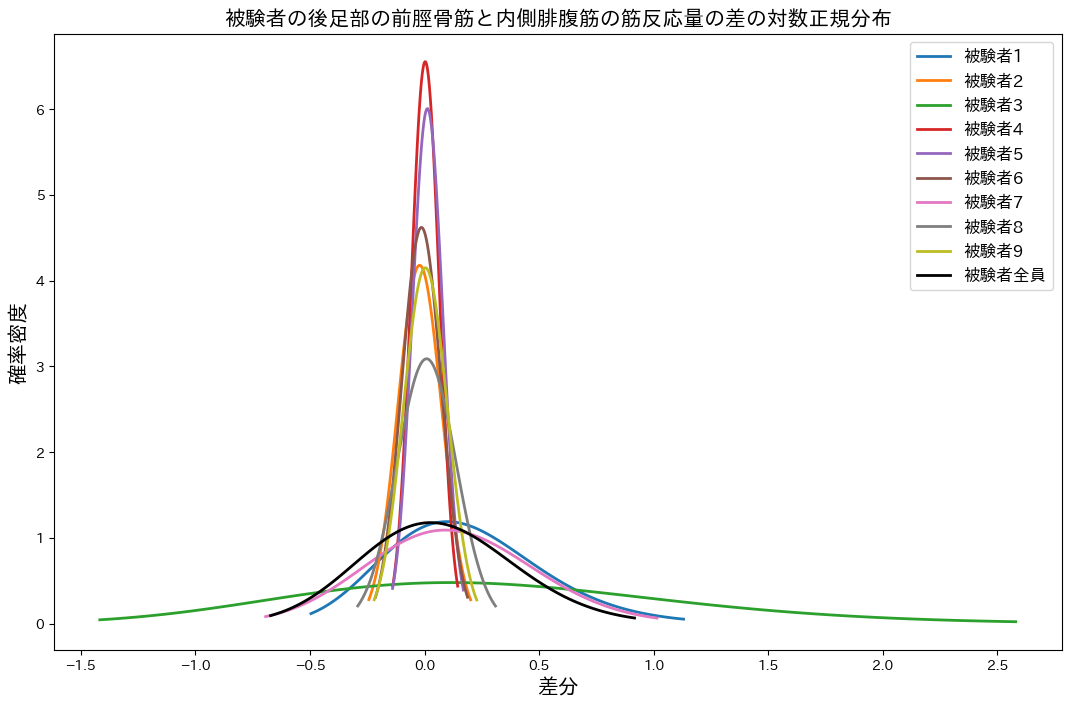

被験者1の後足部の前脛骨筋と内側腓腹筋の差の母平均: 0.1905
被験者1の後足部の前脛骨筋と内側腓腹筋の差の標準偏差: 0.4781
被験者2の後足部の前脛骨筋と内側腓腹筋の差の母平均: -0.0208
被験者2の後足部の前脛骨筋と内側腓腹筋の差の標準偏差: 0.0905
被験者3の後足部の前脛骨筋と内側腓腹筋の差の母平均: 0.3024
被験者3の後足部の前脛骨筋と内側腓腹筋の差の標準偏差: 0.9189
被験者4の後足部の前脛骨筋と内側腓腹筋の差の母平均: 0.0032
被験者4の後足部の前脛骨筋と内側腓腹筋の差の標準偏差: 0.0586
被験者5の後足部の前脛骨筋と内側腓腹筋の差の母平均: 0.0137
被験者5の後足部の前脛骨筋と内側腓腹筋の差の標準偏差: 0.0643
被験者6の後足部の前脛骨筋と内側腓腹筋の差の母平均: -0.0139
被験者6の後足部の前脛骨筋と内側腓腹筋の差の標準偏差: 0.0829
被験者7の後足部の前脛骨筋と内側腓腹筋の差の母平均: 0.119
被験者7の後足部の前脛骨筋と内側腓腹筋の差の標準偏差: 0.488
被験者8の後足部の前脛骨筋と内側腓腹筋の差の母平均: 0.0095
被験者8の後足部の前脛骨筋と内側腓腹筋の差の標準偏差: 0.1287
被験者9の後足部の前脛骨筋と内側腓腹筋の差の母平均: 0.004
被験者9の後足部の前脛骨筋と内側腓腹筋の差の標準偏差: 0.0897
被験者全員の後足部の前脛骨筋と内側腓腹筋の差の母平均: 0.0658
被験者全員の後足部の前脛骨筋と内側腓腹筋の差の標準偏差: 0.4246


In [7]:
mean_tib_list = []
std_tib_list = []
mean_gas_list = []
std_gas_list = []

for data in rear_all_list:
    mean_tib = data['Tibialis antelior'].mean()
    std_tib = data['Tibialis antelior'].std()
    mean_gas = data['Gastrocnemius medialis'].mean()
    std_gas = data['Gastrocnemius medialis'].std()

    mean_tib_list.append(mean_tib)
    std_tib_list.append(std_tib)
    mean_gas_list.append(mean_gas)
    std_gas_list.append(std_gas)

mu_diff_list = [round(mean_tib - mean_gas, 4) for mean_tib, mean_gas in zip(mean_tib_list, mean_gas_list)]
sigma_diff_list = [round(np.sqrt(std_tib**2 + std_gas**2), 4) for std_tib, std_gas in zip(std_tib_list, std_gas_list)]

colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', 'black']
labels = [f'被験者{i+1}' for i in range(len(rear_all_list)-1)] + ['被験者全員']

plt.figure(figsize=(13, 8))

for i, (data, color, label) in enumerate(zip(rear_all_list, colors, labels)):
    mu_diff = data['Tibialis antelior'] - data['Gastrocnemius medialis']
    shape, loc, scale = stats.lognorm.fit(mu_diff)
    x = np.linspace(stats.lognorm.ppf(0.01, shape, loc, scale), stats.lognorm.ppf(0.99, shape, loc, scale), 100)
    y = stats.lognorm.pdf(x, shape, loc, scale)
    plt.plot(x, y, color, lw=2, label=label)

plt.title('被験者の後足部の前脛骨筋と内側腓腹筋の筋反応量の差の対数正規分布', fontsize=15)
plt.xlabel('差分', fontsize=15)
plt.ylabel('確率密度', fontsize=15)
plt.legend(fontsize=12)
results_path = '../Plots/後足部のの前脛骨筋と内側腓腹筋の反応量の差の対数正規分布.png'
plt.savefig(results_path, bbox_inches='tight')
plt.show()

def save_text_image(texts, filename):
    fig, ax = plt.subplots(figsize=(10, len(texts) * 0.4))
    for i, text in enumerate(texts):
        ax.text(0.5, 1 - (i + 1) / len(texts), text, fontsize=12, ha='center', va='center', wrap=True)
    ax.axis('off')
    plt.savefig(filename, bbox_inches='tight', pad_inches=0.1)
    plt.close(fig)
    
results = []
for i in range(9):
    results.append(f"被験者{i+1}の後足部の前脛骨筋と内側腓腹筋の差の母平均: {mu_diff_list[i]}")
    results.append(f"被験者{i+1}の後足部の前脛骨筋と内側腓腹筋の差の標準偏差: {sigma_diff_list[i]}")

results.append(f"被験者全員の後足部の前脛骨筋と内側腓腹筋の差の母平均: {mu_diff_list[-1]}")
results.append(f"被験者全員の後足部の前脛骨筋と内側腓腹筋の差の標準偏差: {sigma_diff_list[-1]}")

for result in results:
    print(result)

save_text_image(results, '../Plots/(全員)後足部の前脛骨筋と内側腓腹筋の差の母平均と標準偏差.png')

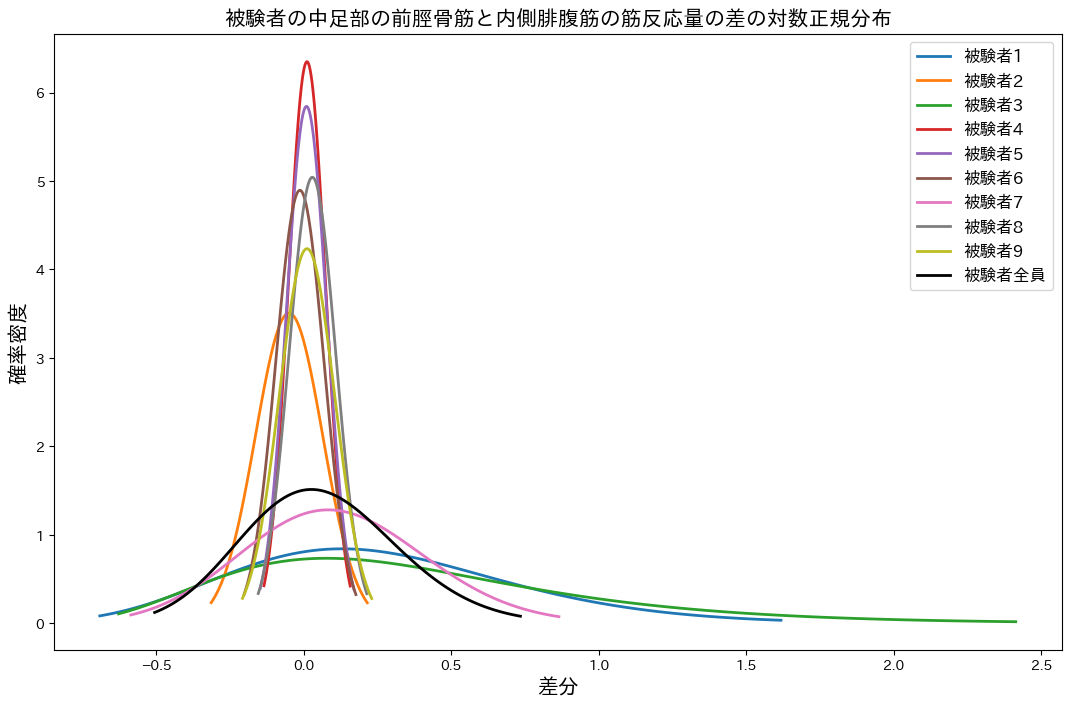

被験者1の中足部の前脛骨筋と内側腓腹筋の差の母平均: 0.2665
被験者1の中足部の前脛骨筋と内側腓腹筋の差の標準偏差: 0.6434
被験者2の中足部の前脛骨筋と内側腓腹筋の差の母平均: -0.0505
被験者2の中足部の前脛骨筋と内側腓腹筋の差の標準偏差: 0.1111
被験者3の中足部の前脛骨筋と内側腓腹筋の差の母平均: 0.4003
被験者3の中足部の前脛骨筋と内側腓腹筋の差の標準偏差: 0.7872
被験者4の中足部の前脛骨筋と内側腓腹筋の差の母平均: 0.0107
被験者4の中足部の前脛骨筋と内側腓腹筋の差の標準偏差: 0.0605
被験者5の中足部の前脛骨筋と内側腓腹筋の差の母平均: 0.0099
被験者5の中足部の前脛骨筋と内側腓腹筋の差の標準偏差: 0.065
被験者6の中足部の前脛骨筋と内側腓腹筋の差の母平均: -0.0126
被験者6の中足部の前脛骨筋と内側腓腹筋の差の標準偏差: 0.0783
被験者7の中足部の前脛骨筋と内側腓腹筋の差の母平均: 0.1054
被験者7の中足部の前脛骨筋と内側腓腹筋の差の標準偏差: 0.4092
被験者8の中足部の前脛骨筋と内側腓腹筋の差の母平均: 0.0288
被験者8の中足部の前脛骨筋と内側腓腹筋の差の標準偏差: 0.0766
被験者9の中足部の前脛骨筋と内側腓腹筋の差の母平均: 0.0104
被験者9の中足部の前脛骨筋と内側腓腹筋の差の標準偏差: 0.0888
被験者全員の中足部の前脛骨筋と内側腓腹筋の差の母平均: 0.0624
被験者全員の中足部の前脛骨筋と内側腓腹筋の差の標準偏差: 0.3512


In [8]:
mid_all_list = [df.abs() for df in [mid_muscle_data1, mid_muscle_data5, mid_muscle_data6,
                                     mid_muscle_data14, mid_muscle_data15, mid_muscle_data16,
                                     mid_muscle_data17, mid_muscle_data19, mid_muscle_data20, mid_all]]

mean_tib_list = []
std_tib_list = []
mean_gas_list = []
std_gas_list = []

for data in mid_all_list:
    mean_tib = data['Tibialis antelior'].mean()
    std_tib = data['Tibialis antelior'].std()
    mean_gas = data['Gastrocnemius medialis'].mean()
    std_gas = data['Gastrocnemius medialis'].std()

    mean_tib_list.append(mean_tib)
    std_tib_list.append(std_tib)
    mean_gas_list.append(mean_gas)
    std_gas_list.append(std_gas)

mu_diff_list = [round(mean_tib - mean_gas, 4) for mean_tib, mean_gas in zip(mean_tib_list, mean_gas_list)]
sigma_diff_list = [round(np.sqrt(std_tib**2 + std_gas**2), 4) for std_tib, std_gas in zip(std_tib_list, std_gas_list)]

colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', 'black']
labels = [f'被験者{i+1}' for i in range(len(mid_all_list)-1)] + ['被験者全員']

plt.figure(figsize=(13, 8))

for i, (data, color, label) in enumerate(zip(mid_all_list, colors, labels)):
    mu_diff = data['Tibialis antelior'] - data['Gastrocnemius medialis']
    shape, loc, scale = stats.lognorm.fit(mu_diff)
    x = np.linspace(stats.lognorm.ppf(0.01, shape, loc, scale), stats.lognorm.ppf(0.99, shape, loc, scale), 100)
    y = stats.lognorm.pdf(x, shape, loc, scale)
    plt.plot(x, y, color, lw=2, label=label)

plt.title('被験者の中足部の前脛骨筋と内側腓腹筋の筋反応量の差の対数正規分布', fontsize=15)
plt.xlabel('差分', fontsize=15)
plt.ylabel('確率密度', fontsize=15)
plt.legend(fontsize=12)
results_path = '../Plots/中足部のの前脛骨筋と内側腓腹筋の反応量の差の対数正規分布.png'
plt.savefig(results_path, bbox_inches='tight')
plt.show()

def save_text_image(texts, filename):
    fig, ax = plt.subplots(figsize=(10, len(texts) * 0.4))
    for i, text in enumerate(texts):
        ax.text(0.5, 1 - (i + 1) / len(texts), text, fontsize=12, ha='center', va='center', wrap=True)
    ax.axis('off')
    plt.savefig(filename, bbox_inches='tight', pad_inches=0.1)
    plt.close(fig)
    
results = []
for i in range(9):
    results.append(f"被験者{i+1}の中足部の前脛骨筋と内側腓腹筋の差の母平均: {mu_diff_list[i]}")
    results.append(f"被験者{i+1}の中足部の前脛骨筋と内側腓腹筋の差の標準偏差: {sigma_diff_list[i]}")

results.append(f"被験者全員の中足部の前脛骨筋と内側腓腹筋の差の母平均: {mu_diff_list[-1]}")
results.append(f"被験者全員の中足部の前脛骨筋と内側腓腹筋の差の標準偏差: {sigma_diff_list[-1]}")

for result in results:
    print(result)

save_text_image(results, '../Plots/(全員)中足部の前脛骨筋と内側腓腹筋の差の母平均と標準偏差.png')

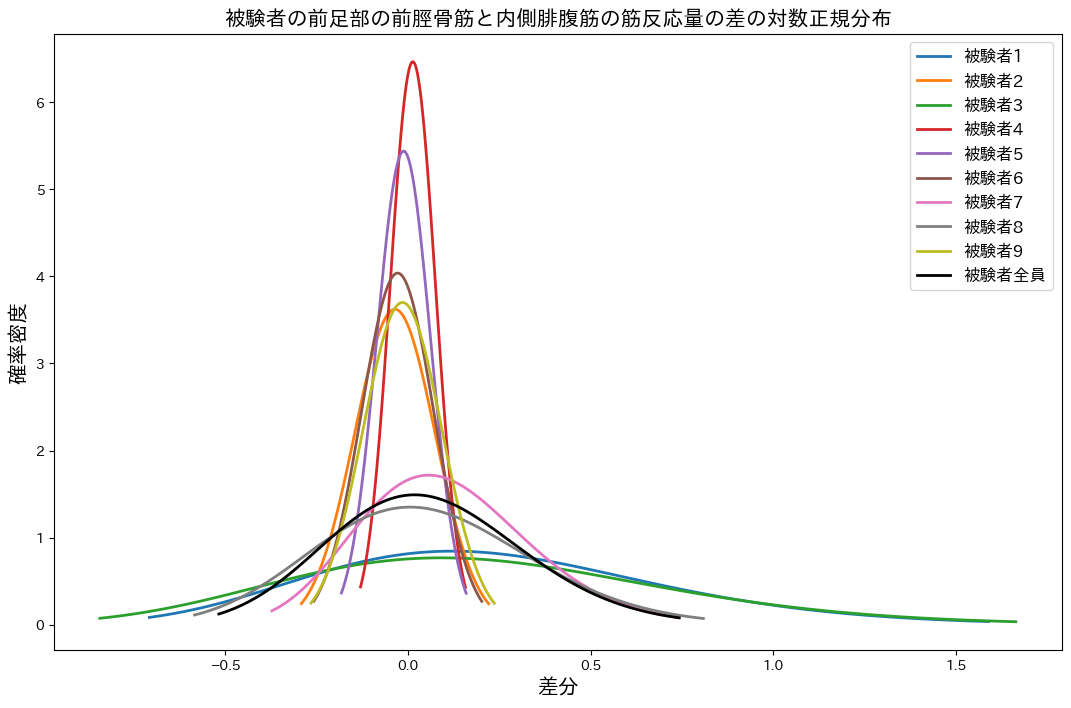

被験者1の前足部の前脛骨筋と内側腓腹筋の差の母平均: 0.2516
被験者1の前足部の前脛骨筋と内側腓腹筋の差の標準偏差: 0.626
被験者2の前足部の前脛骨筋と内側腓腹筋の差の母平均: -0.0353
被験者2の前足部の前脛骨筋と内側腓腹筋の差の標準偏差: 0.1076
被験者3の前足部の前脛骨筋と内側腓腹筋の差の母平均: 0.2225
被験者3の前足部の前脛骨筋と内側腓腹筋の差の標準偏差: 0.6364
被験者4の前足部の前脛骨筋と内側腓腹筋の差の母平均: 0.0136
被験者4の前足部の前脛骨筋と内側腓腹筋の差の標準偏差: 0.0606
被験者5の前足部の前脛骨筋と内側腓腹筋の差の母平均: -0.0113
被験者5の前足部の前脛骨筋と内側腓腹筋の差の標準偏差: 0.0695
被験者6の前足部の前脛骨筋と内側腓腹筋の差の母平均: -0.028
被験者6の前足部の前脛骨筋と内側腓腹筋の差の標準偏差: 0.0932
被験者7の前足部の前脛骨筋と内側腓腹筋の差の母平均: 0.1087
被験者7の前足部の前脛骨筋と内側腓腹筋の差の標準偏差: 0.3531
被験者8の前足部の前脛骨筋と内側腓腹筋の差の母平均: 0.0503
被験者8の前足部の前脛骨筋と内側腓腹筋の差の標準偏差: 0.3582
被験者9の前足部の前脛骨筋と内側腓腹筋の差の母平均: -0.0151
被験者9の前足部の前脛骨筋と内側腓腹筋の差の標準偏差: 0.1023
被験者全員の前足部の前脛骨筋と内側腓腹筋の差の母平均: 0.0575
被験者全員の前足部の前脛骨筋と内側腓腹筋の差の標準偏差: 0.3527


In [9]:
fore_all_list = [df.abs() for df in [fore_muscle_data1, fore_muscle_data5, fore_muscle_data6,
                                     fore_muscle_data14, fore_muscle_data15, fore_muscle_data16,
                                     fore_muscle_data17, fore_muscle_data19, fore_muscle_data20, fore_all]]

mean_tib_list = []
std_tib_list = []
mean_gas_list = []
std_gas_list = []

for data in fore_all_list:
    mean_tib = data['Tibialis antelior'].mean()
    std_tib = data['Tibialis antelior'].std()
    mean_gas = data['Gastrocnemius medialis'].mean()
    std_gas = data['Gastrocnemius medialis'].std()

    mean_tib_list.append(mean_tib)
    std_tib_list.append(std_tib)
    mean_gas_list.append(mean_gas)
    std_gas_list.append(std_gas)

mu_diff_list = [round(mean_tib - mean_gas, 4) for mean_tib, mean_gas in zip(mean_tib_list, mean_gas_list)]
sigma_diff_list = [round(np.sqrt(std_tib**2 + std_gas**2), 4) for std_tib, std_gas in zip(std_tib_list, std_gas_list)]

colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', 'black']
labels = [f'被験者{i+1}' for i in range(len(fore_all_list)-1)] + ['被験者全員']

plt.figure(figsize=(13, 8))

for i, (data, color, label) in enumerate(zip(fore_all_list, colors, labels)):
    mu_diff = data['Tibialis antelior'] - data['Gastrocnemius medialis']
    shape, loc, scale = stats.lognorm.fit(mu_diff)
    x = np.linspace(stats.lognorm.ppf(0.01, shape, loc, scale), stats.lognorm.ppf(0.99, shape, loc, scale), 100)
    y = stats.lognorm.pdf(x, shape, loc, scale)
    plt.plot(x, y, color, lw=2, label=label)

plt.title('被験者の前足部の前脛骨筋と内側腓腹筋の筋反応量の差の対数正規分布', fontsize=15)
plt.xlabel('差分', fontsize=15)
plt.ylabel('確率密度', fontsize=15)
plt.legend(fontsize=12)
results_path = '../Plots/前足部のの前脛骨筋と内側腓腹筋の反応量の差の対数正規分布.png'
plt.savefig(results_path, bbox_inches='tight')
plt.show()

def save_text_image(texts, filename):
    fig, ax = plt.subplots(figsize=(10, len(texts) * 0.4))
    for i, text in enumerate(texts):
        ax.text(0.5, 1 - (i + 1) / len(texts), text, fontsize=12, ha='center', va='center', wrap=True)
    ax.axis('off')
    plt.savefig(filename, bbox_inches='tight', pad_inches=0.1)
    plt.close(fig)
    
results = []
for i in range(9):
    results.append(f"被験者{i+1}の前足部の前脛骨筋と内側腓腹筋の差の母平均: {mu_diff_list[i]}")
    results.append(f"被験者{i+1}の前足部の前脛骨筋と内側腓腹筋の差の標準偏差: {sigma_diff_list[i]}")

results.append(f"被験者全員の前足部の前脛骨筋と内側腓腹筋の差の母平均: {mu_diff_list[-1]}")
results.append(f"被験者全員の前足部の前脛骨筋と内側腓腹筋の差の標準偏差: {sigma_diff_list[-1]}")

for result in results:
    print(result)

save_text_image(results, '../Plots/(全員)前足部の前脛骨筋と内側腓腹筋の差の母平均と標準偏差.png')

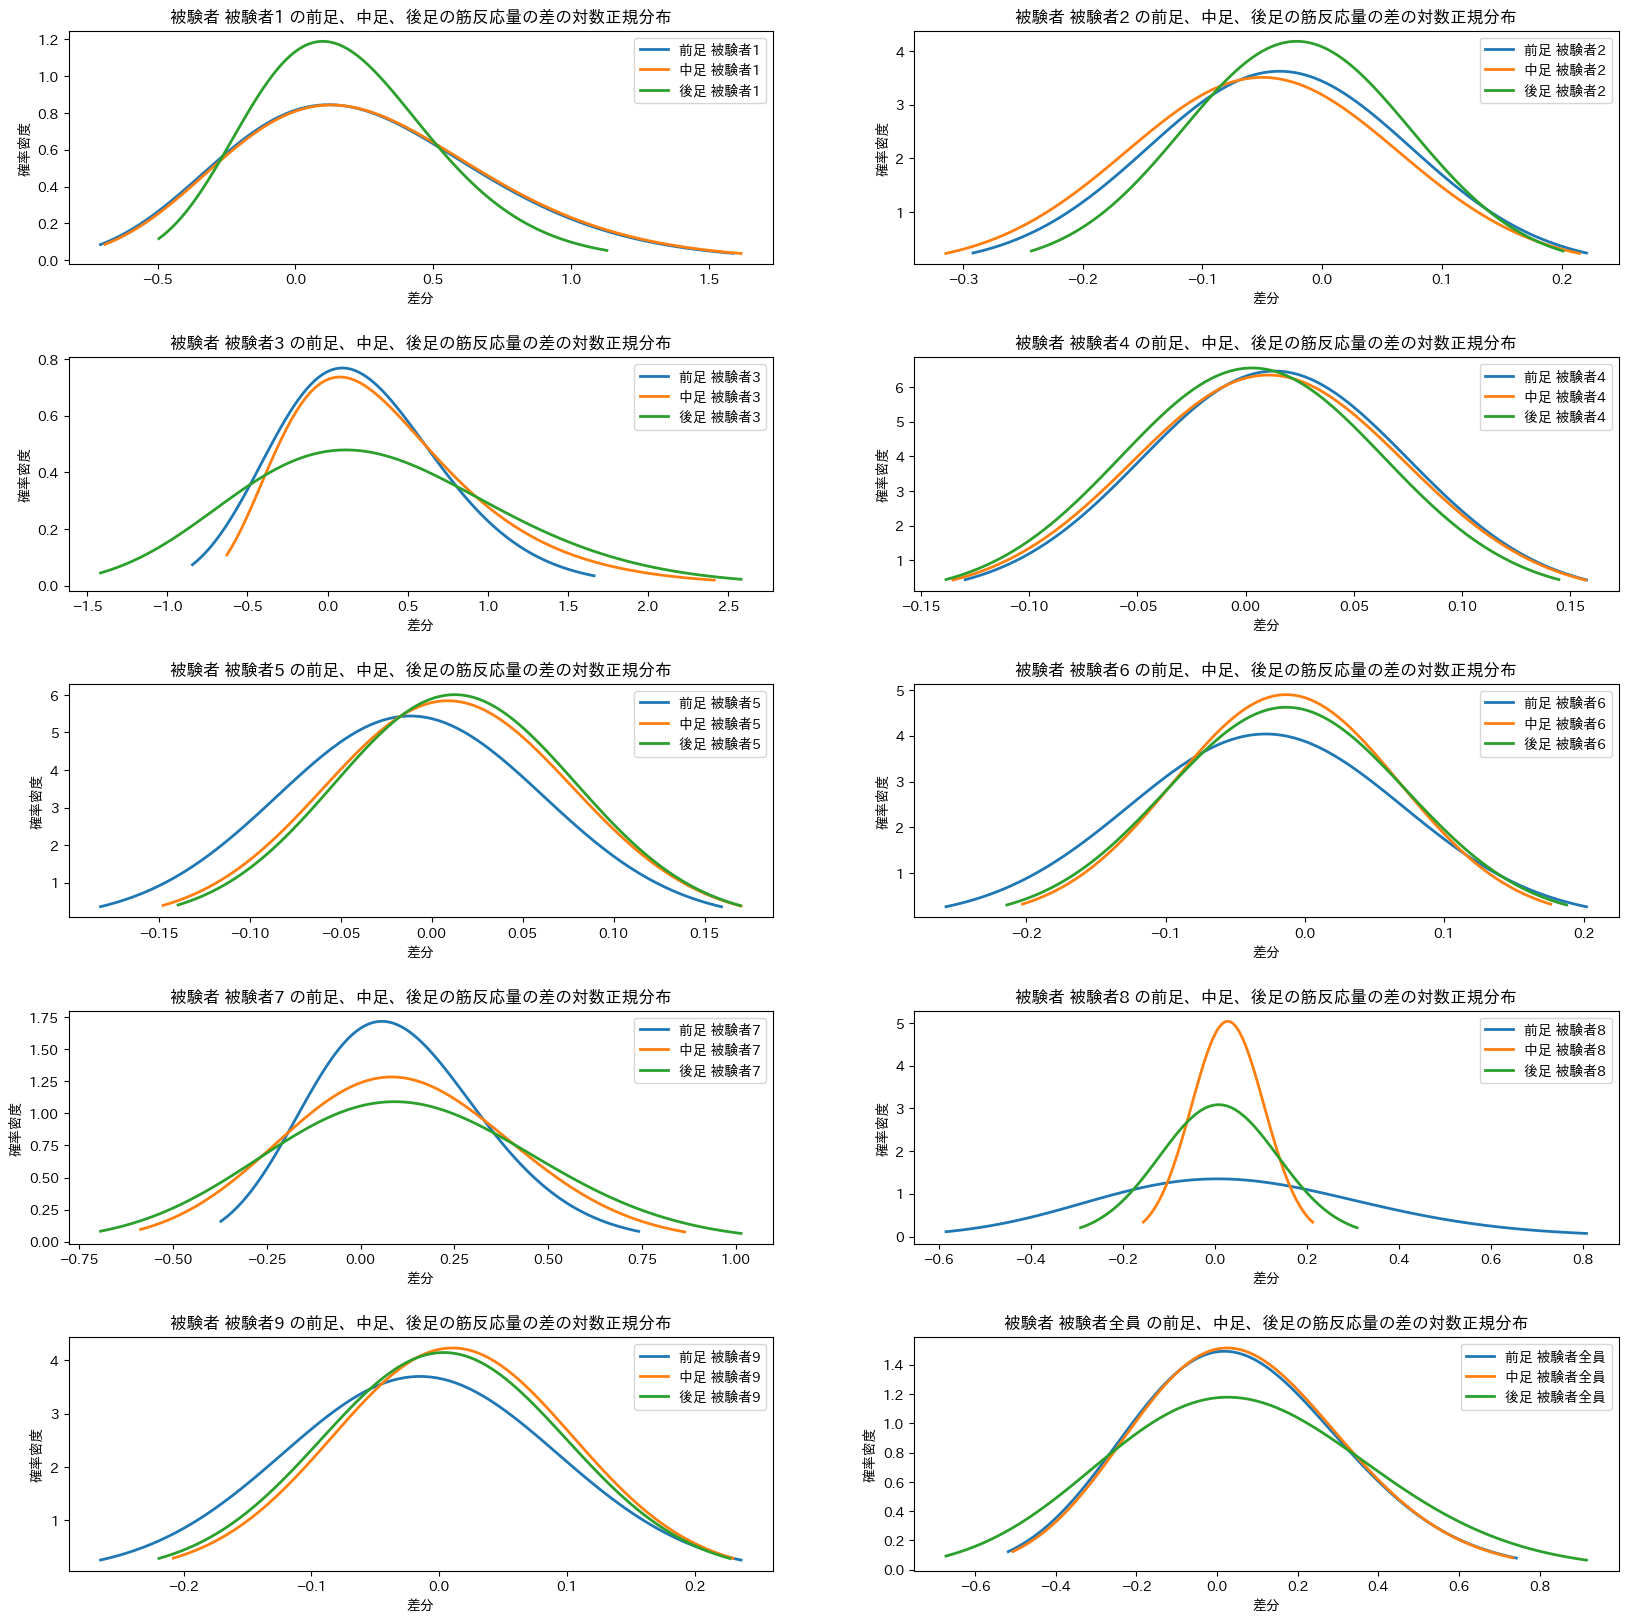

In [10]:
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', 'black']
labels = [f'被験者{i+1}' for i in range(9)] + ['被験者全員']

def plot_combined_distribution(fore_list, mid_list, rear_list, labels, filename):
    n_rows = 5  
    n_cols = 2  
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, n_rows * 4))
    fig.subplots_adjust(hspace=0.4)

    for i in range(len(fore_list)):
        row = i // n_cols
        col = i % n_cols

        ax = axes[row, col]
        for data_list, color, label in zip([fore_list, mid_list, rear_list], ['#1f77b4', '#ff7f0e', '#2ca02c'], ['前足', '中足', '後足']):
            data = data_list[i]
            mu_diff = data['Tibialis antelior'] - data['Gastrocnemius medialis']
            shape, loc, scale = stats.lognorm.fit(mu_diff)
            x = np.linspace(stats.lognorm.ppf(0.01, shape, loc, scale), stats.lognorm.ppf(0.99, shape, loc, scale), 100)
            y = stats.lognorm.pdf(x, shape, loc, scale)
            ax.plot(x, y, color, lw=2, label=f'{label} {labels[i]}')

        ax.set_title(f'被験者 {labels[i]} の前足、中足、後足の筋反応量の差の対数正規分布')
        ax.set_xlabel('差分')
        ax.set_ylabel('確率密度')
        ax.legend()

    plt.savefig(filename, bbox_inches='tight')
    plt.show()

plot_combined_distribution(fore_all_list, mid_all_list, rear_all_list, labels, '../Plots/各被験者の前足中足後足の比較.png')